# <u> Online Shoppers Purchasing Intention </u>

_The dataset consists of feature vectors belonging to 12,330 sessions of users on an e-commerce website with information whether they resulted in shopping. Several factors and other details of the session are also mentioned. We have to build a model to predict whether a session will result in shopping based on these factors and also perform some analysis on how these factors influence our result._

### Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import statsmodels.api as sm

### Importing the dataset

In [2]:
raw_data = pd.read_csv("C://Users//Apoorv//Downloads//Learning//Projects//online_shoppers_intention.csv")
raw_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
raw_data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<AxesSubplot:>

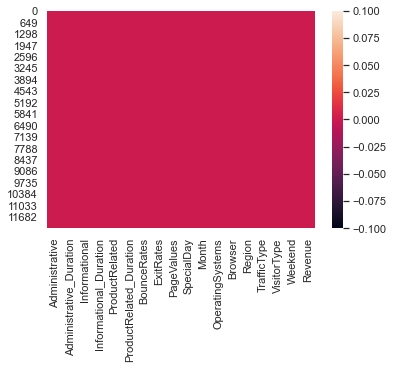

In [5]:
sns.heatmap(raw_data.isnull())
# Clearly, there are no missing values.

__raw_cat = raw_data[['VisitorType', 'Month', 'Weekend', 'Revenue']]__ <br>
These are our four categorical variables. Since,'Weekend' and 'Revenue' are Boolean values, we'll OneHot encode them and obtain dummies for the rest.

### Dealing with categorical values

In [6]:
data_a = raw_data.copy()
#Creating a checkpoint for our dataset because we're going to make some noteworthy changes.
data_a.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
#OneHot Encoding of 'Weekend' and 'Revenue'
data_a['Revenue'] = data_a['Revenue'].astype('int')
data_a['Weekend'] = data_a['Weekend'].astype('int')

In [8]:
#Getting dummies for the remaining two variables.
data_a = pd.get_dummies(data_a, columns = ['Month', 'VisitorType'], drop_first = True)

<br>

__Why have we made dummies for two variables but OneHot encoded the other two?__ 

<br>
 If we had obtained dummies for "Revenue", we'll get "Revenue_True" and "Revenue_False" as the two dummies. The latter is
 however, not included in the dataset for obvious reasons. Doing so would have split our target variable, and simply turning the
 Boolean values into 1 and 0 is a better option to avoid changing the overall structure of our data any more than necessary. 
 The same reasoning applies behind the OneHot Encoding of "Weekend".
 
 The "Month" and "VisitorType", on the other hand, have multiple unique values, and OneHot Encoding is not applicable to them.
 Hence, we obtain dummies.
 
 <br>


In [9]:
data_a.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,0.014923,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,0.121250,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for skewness

For models like Logistic Regression that are based on some assumptions; the independent variables follow some Gaussian Distribution. Hence, we attempt to eliminate Skewness to the greatest extent possible.

In [10]:
data_a.skew()

Administrative                    1.960357
Administrative_Duration           5.615719
Informational                     4.036464
Informational_Duration            7.579185
ProductRelated                    4.341516
ProductRelated_Duration           7.263228
BounceRates                       2.947855
ExitRates                         2.148789
PageValues                        6.382964
SpecialDay                        3.302667
OperatingSystems                  2.066285
Browser                           3.242350
Region                            0.983549
TrafficType                       1.962987
Weekend                           1.265962
Revenue                           1.909509
Month_Dec                         2.074482
Month_Feb                         8.002600
Month_Jul                         5.058083
Month_June                        6.312378
Month_Mar                         1.910367
Month_May                         1.020161
Month_Nov                         1.197644
Month_Oct  

_Values less than "-1" and greater than "1" are said to be highly skewed and negatively impact our model and its predictions.
Our dataset is highly skewed which is evident from the graphs shown below._

<ipython-input-11-0d64db079633>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 720x432 with 0 Axes>

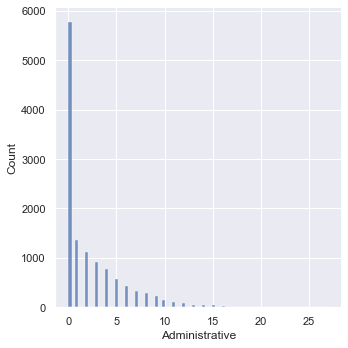

<Figure size 720x432 with 0 Axes>

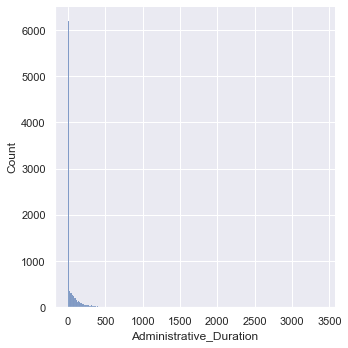

<Figure size 720x432 with 0 Axes>

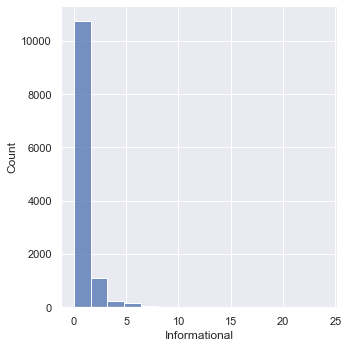

<Figure size 720x432 with 0 Axes>

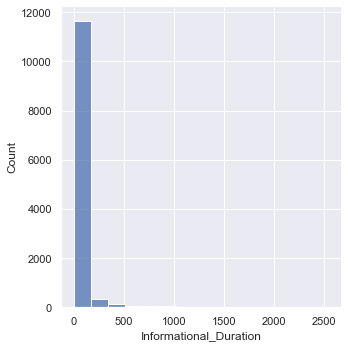

<Figure size 720x432 with 0 Axes>

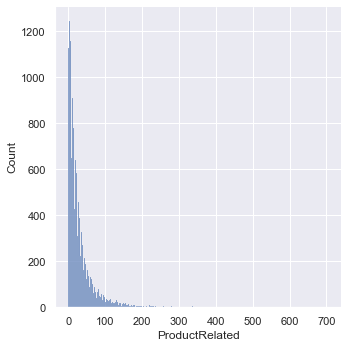

<Figure size 720x432 with 0 Axes>

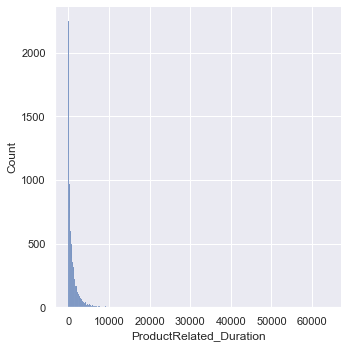

<Figure size 720x432 with 0 Axes>

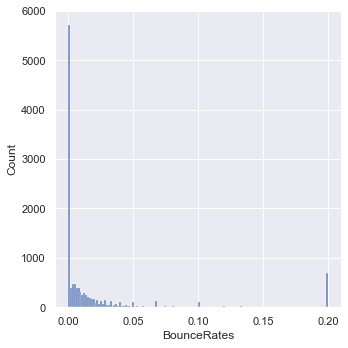

<Figure size 720x432 with 0 Axes>

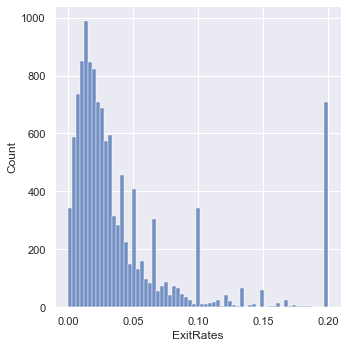

<Figure size 720x432 with 0 Axes>

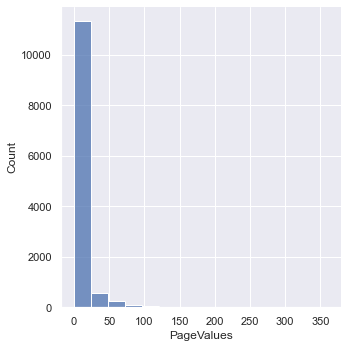

<Figure size 720x432 with 0 Axes>

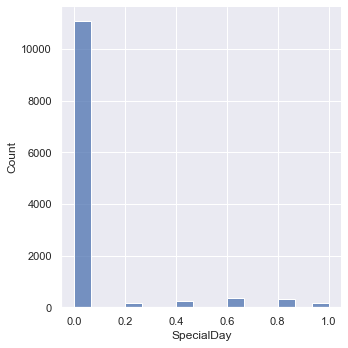

<Figure size 720x432 with 0 Axes>

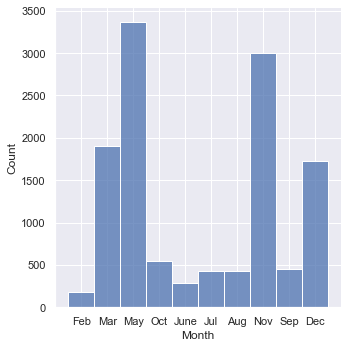

<Figure size 720x432 with 0 Axes>

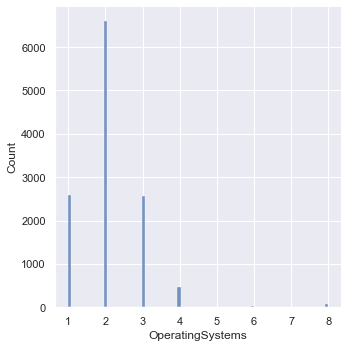

<Figure size 720x432 with 0 Axes>

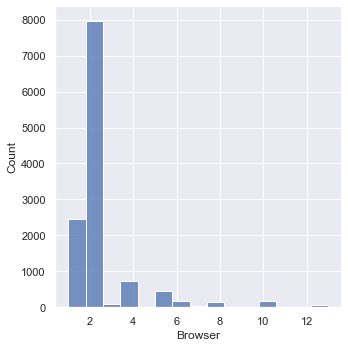

<Figure size 720x432 with 0 Axes>

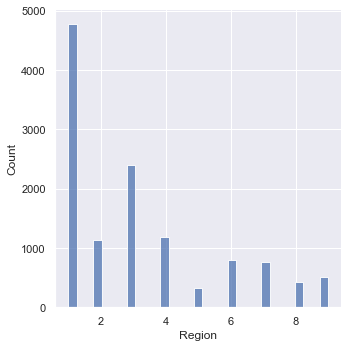

<Figure size 720x432 with 0 Axes>

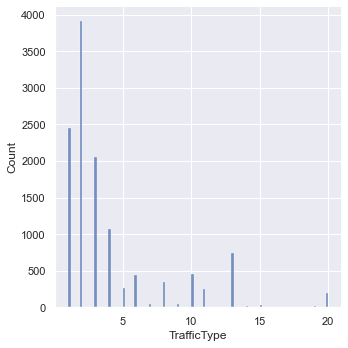

<Figure size 720x432 with 0 Axes>

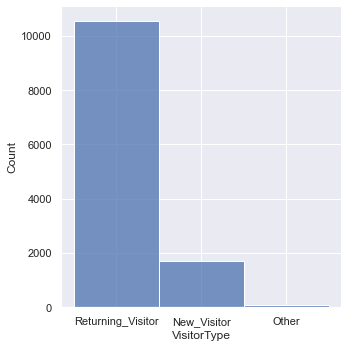

<Figure size 720x432 with 0 Axes>

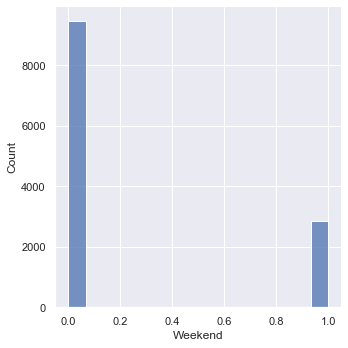

<Figure size 720x432 with 0 Axes>

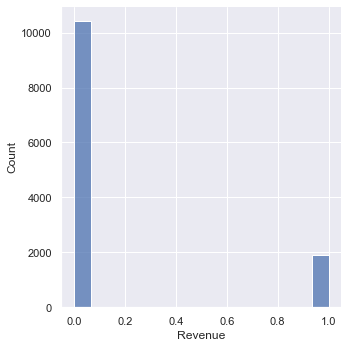

In [11]:
for i in raw_data.columns:
    plt.figure(figsize=(10,6))
    sns.displot(raw_data[i])
plt.show()

##### There's a lot of skewness in our data. Hence, we'll attempt to eliminate this skewness to the greatest extent possible. For this process, we use Boxcox.

The Box-Cox transform is given by:

y = _(x**lmbda - 1) / lmbda_,  __for lmbda != 0__ <br>
    _log(x_),                  __for lmbda = 0__ <br>
> Boxcox requires the input data to be positive. Sometimes a Box-Cox transformation provides a shift parameter to achieve this; Boxcox does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.

In [12]:
data_b = data_a.copy()
for i in data_b.columns.drop(['Revenue']):
    data_b[i], param = stats.boxcox(data_b[i] + 2)                                

In [13]:
data_b.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0.51681,0.657526,0.169617,0.457155,1.070146,0.747782,0.013974,0.023498,0.392899,0.026793,...,0.006285,0.01472,0.009529,0.06341,0.128455,0.109022,0.018613,0.01472,0.003041,7.278253e+06
1,0.51681,0.657526,0.169617,0.457155,1.341174,6.817557,0.013974,0.023498,0.392899,0.026793,...,0.006285,0.01472,0.009529,0.06341,0.128455,0.109022,0.018613,0.01472,0.003041,7.278253e+06
2,0.51681,0.657526,0.169617,0.457155,1.070146,0.747782,0.013974,0.023498,0.392899,0.026793,...,0.006285,0.01472,0.009529,0.06341,0.128455,0.109022,0.018613,0.01472,0.003041,7.278253e+06
3,0.51681,0.657526,0.169617,0.457155,1.341174,1.827994,0.013974,0.023498,0.392899,0.026793,...,0.006285,0.01472,0.009529,0.06341,0.128455,0.109022,0.018613,0.01472,0.003041,7.278253e+06
4,0.51681,0.657526,0.169617,0.457155,2.342422,14.008422,0.013974,0.023498,0.392899,0.026793,...,0.006285,0.01472,0.009529,0.06341,0.128455,0.109022,0.018613,0.01472,0.003041,7.278253e+06


In [14]:
data_b['Revenue'].unique()

array([0, 1])

In [15]:
data_b.drop(['Revenue'], axis = 1).skew()

Administrative                   0.303846
Administrative_Duration          0.181669
Informational                    1.408370
Informational_Duration           1.553501
ProductRelated                   0.007909
ProductRelated_Duration         -0.034019
BounceRates                      0.000000
ExitRates                        0.000000
PageValues                       1.395406
SpecialDay                       0.000000
OperatingSystems                -0.018160
Browser                          0.021981
Region                           0.162711
TrafficType                      0.202965
Weekend                          1.265962
Month_Dec                        0.000000
Month_Feb                        0.000000
Month_Jul                        0.000000
Month_June                       0.000000
Month_Mar                        0.000000
Month_May                        1.020161
Month_Nov                        1.197644
Month_Oct                        0.000000
Month_Sep                        0

In [16]:
data_b['Revenue']

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int32

### Dealing with outliers

Dealing with outliers in this problem is a bit tricky. For instance, the skewness of "VisitorType_Returning_Visitor" is high because "Returning Visitors" are more likely to end their session in shopping compared to other users, as evident from the countplot below. Removing some "Returning_Values" to bring some more symmetry to our dataset will underplay the significance of this particular category and may give an inflated false significance to the other categories.

<AxesSubplot:xlabel='Revenue', ylabel='count'>

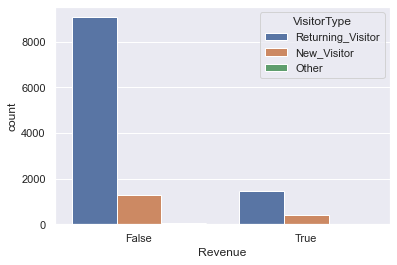

In [17]:
sns.countplot(data = raw_data, x= 'Revenue', hue = 'VisitorType')

From the above argument, it makes sense to ignore the outliers to some extent as we have already adjusted the skewness.
This argument also solidifies that Gaussian Models like "Logistic Regression" will not be an ideal fit for this problem, and other models may give better results. We'll check the same when we proceed towards building models.

### Balancing The Data

There is a clear imbalance in our data. There are far more observations for "False" than there are for "True".

C:\Users\Apoorv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

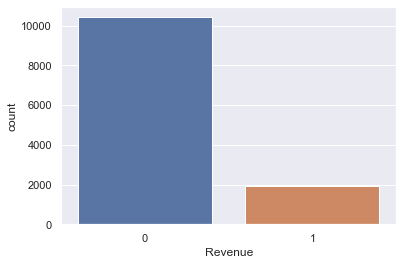

In [18]:
sns.countplot(data_b['Revenue'])

In [19]:
# Creating a copy of our unbalanced data
data_unbal = data_b.copy()

#### Clearly, our data is not balanced. We'll balance the data using the SMOTE technique.
#### First, we need to define our dependent and independent variables and perform the Train-Test Split.

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [20]:
# Defining the dependent and independent variables
y_unbal = data_unbal['Revenue']
x_unbal = data_unbal.drop(['Revenue'], axis = 1)

In [21]:
# Performing the train_test_split
from sklearn.model_selection import train_test_split
x_train_unbal, x_test_unbal, y_train_unbal, y_test_unbal = train_test_split(x_unbal, y_unbal, test_size = 0.25, random_state = 365)

In [22]:
#Balancing the data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 365)
x_bal, y_bal = sm.fit_resample(x_train_unbal, y_train_unbal)

C:\Users\Apoorv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

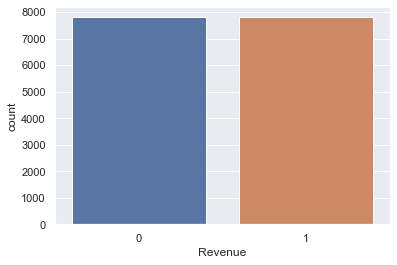

In [23]:
sns.countplot(y_bal)

Our data is now balanced, and is suitable for the purposes for building models.

## Scaling the dataset

We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points. This step is not mandatory when dealing with Tree-based algorithms.

In [24]:
data_unbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  float64
 11  Browser                        12330 non-null  float64
 12  Region                         12330 non-null 

It is debatable whether scaling or standardization should be applied on dummy variables, as these are artificial variables and don't hold much significance on their own and only indicate the presence of a specific category. 
Also, scaling these variables changes its values from the easily interpretable 0 and 1 to some other values.
For this project, we'll be scaling the dummy variables as we're more interested in making accurate predictions than data interpretation. 
Alternatively, a different method involving scaling only continuous variables can also be used.

In [25]:
#Scaling the unbalanced data
from sklearn.preprocessing import StandardScaler
sm_unbal = StandardScaler()
x_train_unbal = sm_unbal.fit_transform(x_train_unbal)
x_test_unbal = sm_unbal.transform(x_test_unbal)

In [26]:
#Scaling the balanced data
from sklearn.model_selection import train_test_split
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x_bal, y_bal, test_size = 0.25, random_state = 365)

In [27]:
sm_bal = StandardScaler()
x_train_bal = sm_bal.fit_transform(x_train_bal)
x_test_bal = sm_bal.transform(x_test_bal)

## Testing Models

### 1. Logistic Regression

In [28]:
# Fitting on Unbalanced Data
from sklearn.linear_model import LogisticRegression
log_ub = LogisticRegression(random_state = 0)
log_ub.fit(x_train_unbal, y_train_unbal)

LogisticRegression(random_state=0)

#### Logistic Regression- Test Data Predictions (Unbalanced Data)

In [33]:
log_test_unbal = log_ub.predict(x_test_unbal)
Log_UB = pd.DataFrame()
Log_UB['Actual'] = y_test_unbal
Log_UB['Predicted'] = log_test_unbal
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(Log_UB)

       Actual  Predicted
7002        0          0
1772        0          0
11266       0          0
2792        0          0
3503        0          0
9558        1          1
7179        1          1
5529        0          0
49          0          0
7358        1          0
6798        0          0
7055        0          0
3512        1          0
3473        0          0
685         0          0
11442       1          1
6074        0          0
6064        0          0
3061        0          0
4688        0          0
11514       0          0
6479        0          1
8311        0          0
10921       0          0
2216        0          0
10576       0          0
507         0          0
5772        0          0
7249        0          0
1326        0          0
6964        0          0
10414       0          1
2090        0          0
866         0          0
4716        0          0
7767        0          0
7599        0          0
9090        0          0
2410        0          0


In [34]:
from sklearn.metrics import confusion_matrix
cm_lub = confusion_matrix(y_test_unbal, log_test_unbal)
print(cm_lub)

[[2491  126]
 [ 186  280]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test_unbal, log_test_unbal))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2617
           1       0.69      0.60      0.64       466

    accuracy                           0.90      3083
   macro avg       0.81      0.78      0.79      3083
weighted avg       0.89      0.90      0.90      3083



#### Logistic Regression- Train Data Predictions (Balanced Data)

In [36]:
log_b = LogisticRegression(random_state = 0)
log_b.fit(x_train_bal, y_train_bal)
log_test_bal = log_b.predict(x_test_bal)
Log_B = pd.DataFrame()
Log_B['Actual'] = y_test_bal
Log_B['Predicted'] = log_test_bal
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(Log_B)

       Actual  Predicted
9764        1          1
7639        1          1
8314        0          0
7674        0          0
4050        0          0
8223        0          0
786         0          0
14167       1          1
3953        1          1
4583        0          0
10761       1          1
12599       1          0
6527        0          0
173         0          0
9837        1          1
8368        0          0
9506        1          1
3448        1          1
2926        0          0
6345        0          0
1871        0          0
9372        1          1
14942       1          1
4673        0          0
1720        0          0
13886       1          1
9205        0          0
11755       1          1
5272        0          1
11140       1          1
3188        1          1
2526        0          0
13904       1          1
14554       1          1
4353        0          0
3788        0          0
2117        0          0
4581        1          1
1011        1          0


In [37]:
cm_lb = confusion_matrix(y_test_bal, log_test_bal)
print(cm_lb)

[[1715  233]
 [ 288 1667]]


In [38]:
print(classification_report(y_test_bal, log_test_bal))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1948
           1       0.88      0.85      0.86      1955

    accuracy                           0.87      3903
   macro avg       0.87      0.87      0.87      3903
weighted avg       0.87      0.87      0.87      3903



From, the above results, we can interpret - 

For Unbalanced Data, we get an accuracy of 90%. However, accuracy alone is often a misleading measure of the quality of the model. We obtain the Confusion Matrix and the F1 Scores and find out that our model is not suitable for predicting the class "0", which is reflected in our F1_Scores (0.94 for Category 0 and a meagre 0.64 for Category 1), and the Confusion Matrix (186 Wrong and 280 Correct Predictions).

For Balanced Data, the accuracy is slightly lower at 87% but the quality of our model's predictions has increased, reflected by the 0.87 and 0.86 F1 scores for both the categories. The probability of misclassifying an observation has also reduced significantly.

HENCE, despite the reduced accuracy, the model for balanced data is more appropriate than the one made on unbalanced data.

Now, we'll check for OVERFITTING by testing the model on the train data.


#### Logistic Regression- Train Data Predictions (Unbalanced Data)

In [49]:
log_trub = LogisticRegression(random_state = 0)
log_trub.fit(x_train_unbal, y_train_unbal)
log_train_unbal = log_trub.predict(x_train_unbal)
cm_trub = confusion_matrix(y_train_unbal, log_train_unbal)
print(cm_trub)

[[7440  365]
 [ 585  857]]


In [50]:
print(classification_report(y_train_unbal, log_train_unbal))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7805
           1       0.70      0.59      0.64      1442

    accuracy                           0.90      9247
   macro avg       0.81      0.77      0.79      9247
weighted avg       0.89      0.90      0.89      9247



#### Logistic Regression- Train Data Predictions (Balanced Data)

In [52]:
log_trb = LogisticRegression(random_state = 0)
log_trb.fit(x_train_bal, y_train_bal)
log_train_bal = log_trb.predict(x_train_bal)
cm_trb = confusion_matrix(y_train_bal, log_train_bal)
print(cm_trb)

[[5123  734]
 [ 871 4979]]


In [53]:
print(classification_report(y_train_bal, log_train_bal))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5857
           1       0.87      0.85      0.86      5850

    accuracy                           0.86     11707
   macro avg       0.86      0.86      0.86     11707
weighted avg       0.86      0.86      0.86     11707



Similar results are seen in the train data results as well.
Comparing the test and train results, it's clear that our data is not overfitted.
Clearly, balanced data is giving better results, so, we'll only be testing the following models on the balanced data.

### 2. K-Nearest Neighbours (KNN)

#### KNN- Test Data

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_test = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_test.fit(x_train_bal, y_train_bal)
knn_tp = knn_test.predict(x_test_bal)
cm_knn_t = confusion_matrix(y_test_bal, knn_tp)
print(cm_knn_t)

[[1664  284]
 [  86 1869]]


In [70]:
print(classification_report(y_test_bal, knn_tp))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1948
           1       0.87      0.96      0.91      1955

    accuracy                           0.91      3903
   macro avg       0.91      0.91      0.90      3903
weighted avg       0.91      0.91      0.90      3903



#### KNN- Train Data

In [74]:
knn_train = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_train.fit(x_train_bal, y_train_bal)
knn_trp = knn_test.predict(x_train_bal)
cm_knn_tr = confusion_matrix(y_train_bal, knn_trp)
print(cm_knn_tr), 
print(classification_report(y_train_bal, knn_trp))

[[5211  646]
 [ 116 5734]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      5857
           1       0.90      0.98      0.94      5850

    accuracy                           0.93     11707
   macro avg       0.94      0.93      0.93     11707
weighted avg       0.94      0.93      0.93     11707



### 3. Support Vector Machine

#### SVM- Test Data
 We have also fitted the model with different kernels, but 'rbf' gives the best results.

In [77]:
from sklearn.svm import SVC
svm_t = SVC(kernel = 'rbf', random_state =0)
svm_t.fit(x_train_bal, y_train_bal)
svm_tp = svm_t.predict(x_test_bal)
cm_svmt = confusion_matrix(y_test_bal, svm_tp)
print(cm_svmt),
print(classification_report(y_test_bal, svm_tp))

[[1765  183]
 [ 167 1788]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1948
           1       0.91      0.91      0.91      1955

    accuracy                           0.91      3903
   macro avg       0.91      0.91      0.91      3903
weighted avg       0.91      0.91      0.91      3903



#### SVM- Train Data

In [80]:
from sklearn.svm import SVC
svm_tr = SVC(kernel = 'rbf', random_state =0)
svm_tr.fit(x_train_bal, y_train_bal)
svm_trp = svm_tr.predict(x_train_bal)
cm_svmtr = confusion_matrix(y_train_bal, svm_trp)
print(cm_svmtr),
print(classification_report(y_train_bal, svm_trp))

[[5363  494]
 [ 460 5390]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5857
           1       0.92      0.92      0.92      5850

    accuracy                           0.92     11707
   macro avg       0.92      0.92      0.92     11707
weighted avg       0.92      0.92      0.92     11707



So far, we have obtained the best accuracy and F1 scores from the SVM Model.

### 4. Naive Bayes

#### Naive Bayes- Test Data

In [81]:
from sklearn.naive_bayes import GaussianNB
nb_t = GaussianNB()
nb_t.fit(x_train_bal, y_train_bal)
nb_tp = nb_t.predict(x_test_bal)
cm_tp = confusion_matrix(y_test_bal, nb_tp)
print(cm_tp),
print(classification_report(y_test_bal, nb_tp))

[[1519  429]
 [ 236 1719]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1948
           1       0.80      0.88      0.84      1955

    accuracy                           0.83      3903
   macro avg       0.83      0.83      0.83      3903
weighted avg       0.83      0.83      0.83      3903



#### Naive Bayes- Train Data

In [82]:
from sklearn.naive_bayes import GaussianNB
nb_tr = GaussianNB()
nb_tr.fit(x_train_bal, y_train_bal)
nb_trp = nb_tr.predict(x_train_bal)
cm_trp = confusion_matrix(y_train_bal, nb_trp)
print(cm_trp),
print(classification_report(y_train_bal, nb_trp))

[[4489 1368]
 [ 704 5146]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      5857
           1       0.79      0.88      0.83      5850

    accuracy                           0.82     11707
   macro avg       0.83      0.82      0.82     11707
weighted avg       0.83      0.82      0.82     11707



### 5. Decision Tree

#### Decision Tree- Test Data

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree_t = DecisionTreeClassifier()
tree_t.fit(x_train_bal, y_train_bal)
tree_tp = tree_t.predict(x_test_bal)
cm_t = confusion_matrix(y_test_bal, tree_tp)
print(cm_t),
print(classification_report(y_test_bal, tree_tp))

[[1745  203]
 [ 161 1794]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1948
           1       0.90      0.92      0.91      1955

    accuracy                           0.91      3903
   macro avg       0.91      0.91      0.91      3903
weighted avg       0.91      0.91      0.91      3903



#### Decision Tree- Train Data

In [85]:
from sklearn.tree import DecisionTreeClassifier
tree_tr = DecisionTreeClassifier()
tree_tr.fit(x_train_bal, y_train_bal)
tree_trp = tree_tr.predict(x_train_bal)
cm_tr = confusion_matrix(y_train_bal, tree_trp)
print(cm_tr),
print(classification_report(y_train_bal, tree_trp))

[[5857    0]
 [   0 5850]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5857
           1       1.00      1.00      1.00      5850

    accuracy                           1.00     11707
   macro avg       1.00      1.00      1.00     11707
weighted avg       1.00      1.00      1.00     11707



The Decision Tree is clearly overfit. To reduce this, we first apply "K-Fold Cross Validation" followed by a "Grid Search" to get the optimal values of parameters to avoid overfitting.

#### Cross Validation in Decision Tree

In [87]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = tree_t, X = x_train_bal, y = y_train_bal, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.66 %
Standard Deviation: 1.31 %


#### Grid Search for optimal value of Decision Tree parameters

In [89]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth' : [3, 5, 7, 9, 10],  'max_leaf_nodes': [20, 30, 40, 50, 60],'min_samples_leaf': [5, 10, 15, 20, 25],
               'min_samples_split': [15, 30, 50, 60, 80]}]
grid_search = GridSearchCV(estimator = tree_t, param_grid = parameters, cv =5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(x_train_bal, y_train_bal)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.19 %
Best Parameters: {'max_depth': 7, 'max_leaf_nodes': 50, 'min_samples_leaf': 10, 'min_samples_split': 30}


In [92]:
# This is our optimized Decision Tree
tree_opt = DecisionTreeClassifier(max_depth= 7, max_leaf_nodes= 50, min_samples_leaf= 10, min_samples_split= 30)

In [93]:
tree_opt.fit(x_train_bal, y_train_bal)
tree_test = tree_opt.predict(x_test_bal)
print(classification_report(y_test_bal,tree_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1948
           1       0.93      0.93      0.93      1955

    accuracy                           0.93      3903
   macro avg       0.93      0.93      0.93      3903
weighted avg       0.93      0.93      0.93      3903



In [94]:
tree_train = tree_opt.predict(x_train_bal)
print(classification_report(y_train_bal,tree_train))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5857
           1       0.93      0.93      0.93      5850

    accuracy                           0.93     11707
   macro avg       0.93      0.93      0.93     11707
weighted avg       0.93      0.93      0.93     11707



This model is clearly not overfit and has provided the best results so far.

### 6. Random Forest

#### Random Forest- Test Data

We have used the parameters of the Decision Tree model as the optimal values for the same are already calculated earlier.

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_t = RandomForestClassifier(max_depth = 7,  max_leaf_nodes =  50, min_samples_leaf=  10,
               min_samples_split =  30, n_estimators = 20, criterion = 'entropy', random_state = 0)
rf_t.fit(x_train_bal, y_train_bal)
rf_test = rf_t.predict(x_test_bal)
print(classification_report(y_test_bal, rf_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1948
           1       0.91      0.92      0.92      1955

    accuracy                           0.91      3903
   macro avg       0.91      0.91      0.91      3903
weighted avg       0.91      0.91      0.91      3903



#### Random Forest- Train Data

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_tr = RandomForestClassifier(max_depth = 7,  max_leaf_nodes =  50, min_samples_leaf=  10,
               min_samples_split =  30, n_estimators = 20, criterion = 'entropy', random_state = 0)
rf_tr.fit(x_train_bal, y_train_bal)
rf_train = rf_tr.predict(x_train_bal)
print(classification_report(y_train_bal, rf_train))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5857
           1       0.91      0.93      0.92      5850

    accuracy                           0.92     11707
   macro avg       0.92      0.92      0.92     11707
weighted avg       0.92      0.92      0.92     11707



### 7. Artificial Neural Networks (ANN)

In [108]:
import tensorflow as tf

In [109]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train_bal, y_train_bal, batch_size = 32, epochs = 100)

Epoch 1/100
366/366 [==============================] - 4s 1ms/step - loss: 0.6149 - accuracy: 0.7145
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8580
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8647
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8710
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2947 - accuracy: 0.8778: 0s - loss: 0.2879 - accura
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.8844
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.8882
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8900
Epoch 9/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2708 - accuracy: 0.8920
Epoch 10/100
366/366 [==============================] - 1s 1ms/

366/366 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.9123
Epoch 82/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.9148
Epoch 83/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9139
Epoch 84/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9149
Epoch 85/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9135
Epoch 86/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9155
Epoch 87/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2050 - accuracy: 0.9147: 0s - loss: 0.2040 - 
Epoch 88/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.9140
Epoch 89/100
366/366 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9165
Epoch 90/100
366/366 [==============================] - 1s 1ms/step - los

In [122]:
ann_test = ann.predict(x_test_bal)
ann_test = (ann_test > 0.5)

In [118]:
print(classification_report(y_test_bal,ann_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1948
           1       0.90      0.93      0.91      1955

    accuracy                           0.91      3903
   macro avg       0.91      0.91      0.91      3903
weighted avg       0.91      0.91      0.91      3903



In [121]:
ann_train = ann.predict(x_train_bal)
ann_train = (ann_train > 0.5)
print(classification_report(y_train_bal,ann_train))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5857
           1       0.90      0.93      0.92      5850

    accuracy                           0.92     11707
   macro avg       0.92      0.92      0.92     11707
weighted avg       0.92      0.92      0.92     11707



### 8. XG Boost

In [135]:
from xgboost import XGBClassifier
xg_t = XGBClassifier(n_estimators = 30, n_jobs = -1, max_depth = 5)
xg_t.fit(x_train_bal, y_train_bal)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
xg_test = xg_t.predict(x_test_bal)
print(classification_report(y_test_bal, xg_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1948
           1       0.94      0.94      0.94      1955

    accuracy                           0.94      3903
   macro avg       0.94      0.94      0.94      3903
weighted avg       0.94      0.94      0.94      3903



In [137]:
xg_train = xg_t.predict(x_train_bal)
print(classification_report(y_train_bal, xg_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5857
           1       0.97      0.95      0.96      5850

    accuracy                           0.96     11707
   macro avg       0.96      0.96      0.96     11707
weighted avg       0.96      0.96      0.96     11707



## Results

In [146]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
Summary = pd.DataFrame()
Summary['Model'] = ['Logistic Regression', 'Logistic Regression', 'KNN', 'KNN', 'SVM', 'SVM', 'NaiveBayes', 'NaiveBayes', 'OptDecisionTree', 'OptDecisionTree', 'RandomForest', 'RandomForest', 'ANN', 'ANN', 'XGBoost', 'XGBoost']
Summary['Dataset'] = ['Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data', 'Test_Data', 'Training_Data']
Summary['Accuracy'] = [accuracy_score(y_test_bal, log_test_bal), accuracy_score(y_train_bal, log_train_bal), accuracy_score(y_test_bal, knn_tp), accuracy_score(y_train_bal, knn_trp), accuracy_score(y_test_bal, svm_tp), accuracy_score(y_train_bal, svm_trp), accuracy_score(y_test_bal, nb_tp), accuracy_score(y_train_bal, nb_trp), accuracy_score(y_test_bal, tree_test), accuracy_score(y_train_bal, tree_train), accuracy_score(y_test_bal, rf_test), accuracy_score(y_train_bal, rf_train), accuracy_score(y_test_bal, ann_test), accuracy_score(y_train_bal, ann_train), accuracy_score(y_test_bal, xg_test), accuracy_score(y_train_bal, xg_train)]
Summary['Recall'] = [recall_score(y_test_bal, log_test_bal), recall_score(y_train_bal, log_train_bal), recall_score(y_test_bal, knn_tp), recall_score(y_train_bal, knn_trp), recall_score(y_test_bal, svm_tp), recall_score(y_train_bal, svm_trp), recall_score(y_test_bal, nb_tp), recall_score(y_train_bal, nb_trp), recall_score(y_test_bal, tree_test), recall_score(y_train_bal, tree_train), recall_score(y_test_bal, rf_test), recall_score(y_train_bal, rf_train), recall_score(y_test_bal, ann_test), recall_score(y_train_bal, ann_train), recall_score(y_test_bal, xg_test), recall_score(y_train_bal, xg_train)]
Summary['Precision'] = [precision_score(y_test_bal, log_test_bal), precision_score(y_train_bal, log_train_bal), precision_score(y_test_bal, knn_tp), precision_score(y_train_bal, knn_trp), precision_score(y_test_bal, svm_tp), precision_score(y_train_bal, svm_trp), precision_score(y_test_bal, nb_tp), precision_score(y_train_bal, nb_trp), precision_score(y_test_bal, tree_test), precision_score(y_train_bal, tree_train), precision_score(y_test_bal, rf_test), precision_score(y_train_bal, rf_train), precision_score(y_test_bal, ann_test), precision_score(y_train_bal, ann_train), precision_score(y_test_bal, xg_test), precision_score(y_train_bal, xg_train)]
Summary['F1_Score'] = [f1_score(y_test_bal, log_test_bal), f1_score(y_train_bal, log_train_bal), f1_score(y_test_bal, knn_tp), f1_score(y_train_bal, knn_trp), f1_score(y_test_bal, svm_tp), f1_score(y_train_bal, svm_trp), f1_score(y_test_bal, nb_tp), f1_score(y_train_bal, nb_trp), f1_score(y_test_bal, tree_test), f1_score(y_train_bal, tree_train), f1_score(y_test_bal, rf_test), f1_score(y_train_bal, rf_train), f1_score(y_test_bal, ann_test), f1_score(y_train_bal, ann_train), f1_score(y_test_bal, xg_test), f1_score(y_train_bal, xg_train)]


In [147]:
Summary

,Model,Dataset,Accuracy,Recall,Precision,F1_Score
0,Logistic Regression,Test_Data,0.866513,0.852685,0.877368,0.864851
1,Logistic Regression,Training_Data,0.862903,0.851111,0.871521,0.861195
2,KNN,Test_Data,0.905201,0.956010,0.868091,0.909932
3,KNN,Training_Data,0.934911,0.980171,0.898746,0.937694
4,SVM,Test_Data,0.859851,0.828133,0.884699,0.855482
5,SVM,Training_Data,0.918510,0.921368,0.916044,0.918698
6,NaiveBayes,Test_Data,0.829618,0.879284,0.800279,0.837923
7,NaiveBayes,Training_Data,0.823012,0.879658,0.789991,0.832417
8,OptDecisionTree,Test_Data,0.925954,0.925831,0.926305,0.926068
9,OptDecisionTree,Training_Data,0.931323,0.928889,0.933356,0.931117


The above table provides the results of different kinds of models in detail. 
Based on the nature of the problem at hand, any of the following models can be used.
__The optimised Decision Tree and XG Boost give the best accuracies along with the best F1 Scores__

When a new dataset is brought in for prediction, the following preprocessing steps must be applied before any of the above specified models can be used on this new dataset.
> * The variable "Weekend" must be OneHot Encoded. The variable "Revenue" is to be predicted.
> * Dummies for the variables "VisitorType", "Month" must be obtained.
> * The values must be adjusted for skewness using Boxcox as done earlier.
> * The values must be scaled using "transform" only with the same scaler used on train data.
> * The order of columns of the new data being fed to the model must be same as that of the train data. 

## EDA

EDA is done on the untampered original dataset. Balancing, Scaling, etc. are only used to create better models.

In [148]:
raw_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

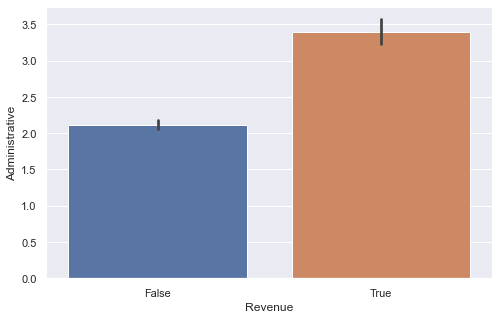

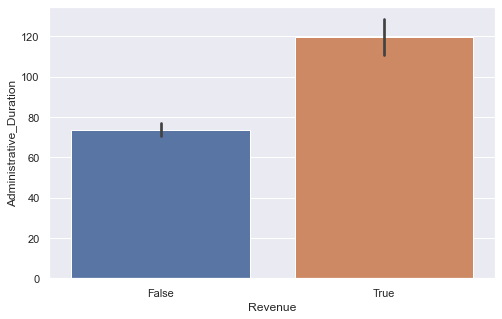

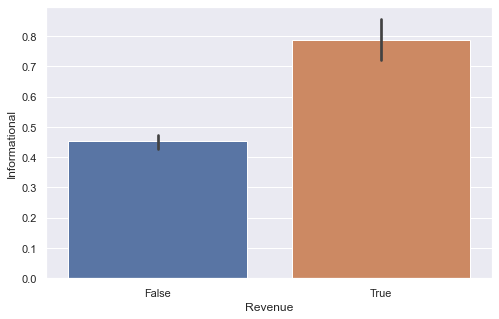

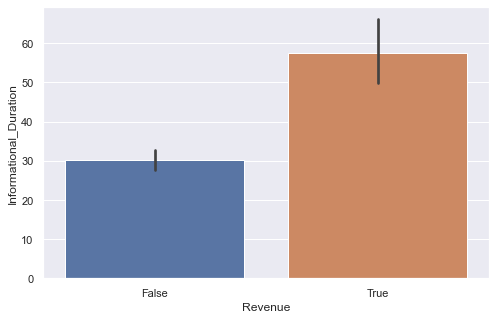

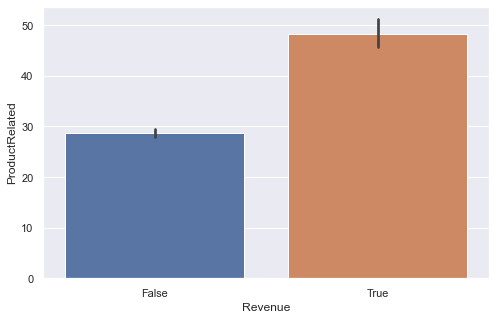

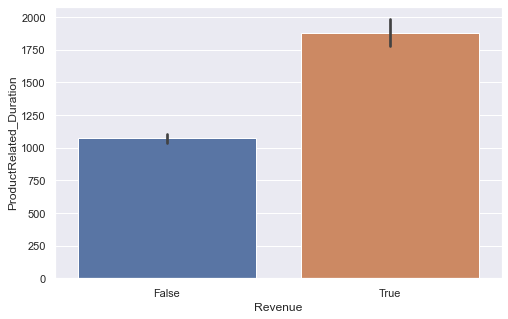

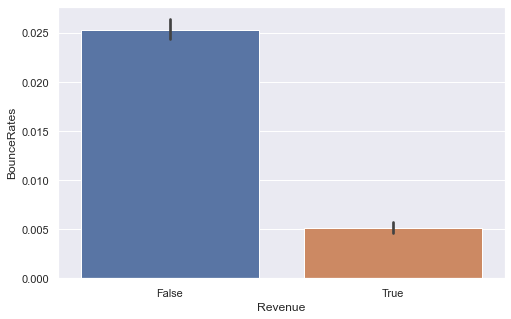

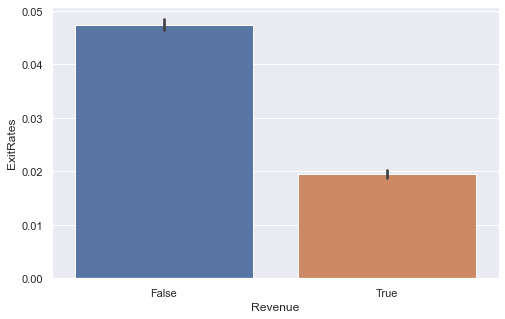

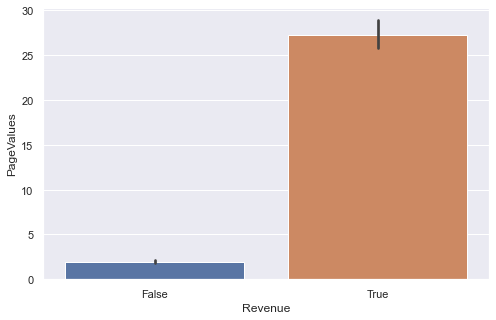

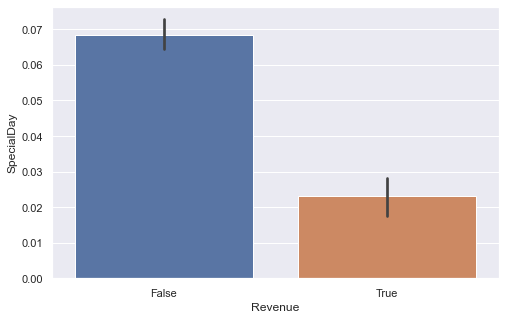

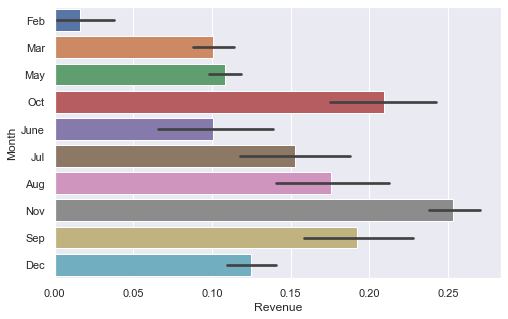

In [172]:
for i in raw_data.columns.drop(['Revenue', 'Weekend', 'OperatingSystems', 'Browser', 'Region', "TrafficType", 'VisitorType']):
    plt.figure(figsize = (8,5))
    sns.barplot(y = raw_data[i], x = "Revenue", data = raw_data)

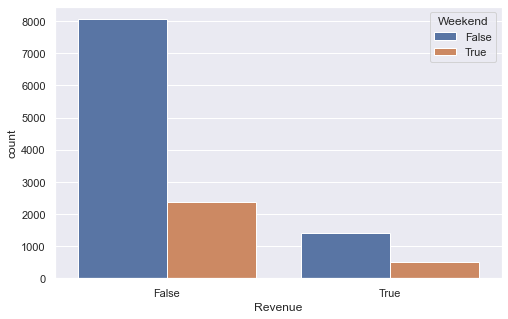

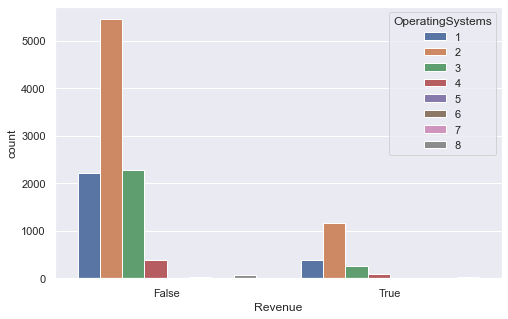

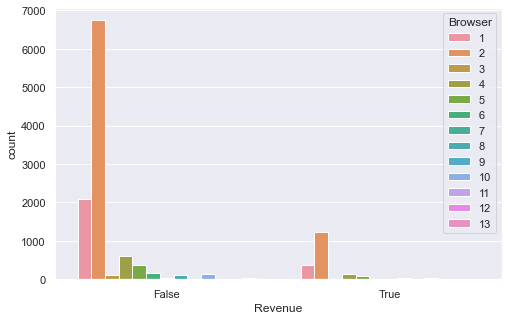

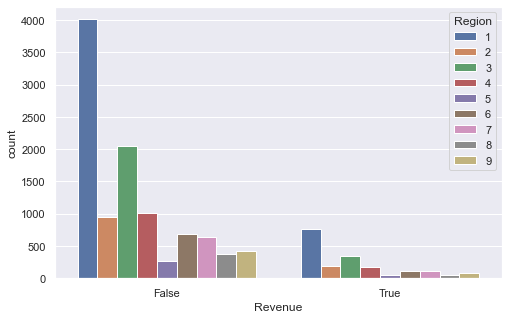

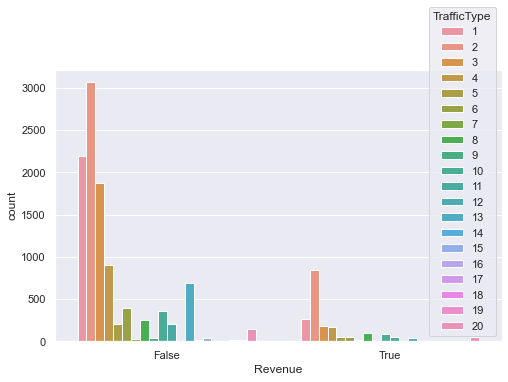

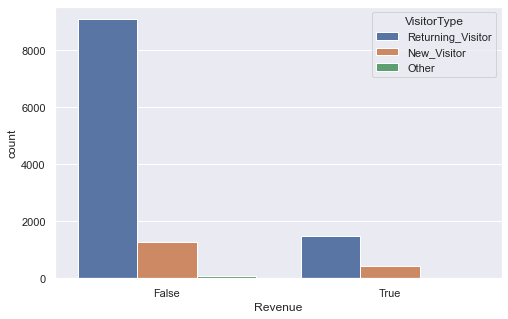

In [178]:
for i in raw_data[['Weekend', 'OperatingSystems', 'Browser', 'Region', "TrafficType", 'VisitorType']]:
    plt.figure(figsize = (8,5))
    sns.countplot(x = 'Revenue', hue = i, data = raw_data)

Further EDA can be done and several types of charts, tables and graphs can be obtained depending upon the type and nature of data interpretation required in the problem.